<a href="https://colab.research.google.com/github/harsh21CSU182/Harsh-Kaushik-RL/blob/main/RL_PRACTICAL_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
#Define Environment
#Define the total number of turns (i.e., the number of times we will play a slot machine).
#Remember, we have
#1. We thus have 1,000 turns.
number_of_turns = 1000

#define the total number of slot machines
number_of_slot_machines = 6

#Define arrays where we can keep track of our wins (positive rewards)
#and losses (negative rewards) for each slot machine.
number_of_positive_rewards = np.zeros(number_of_slot_machines)
number_of_negative_rewards = np.zeros(number_of_slot_machines)

#define a seed for the random number generator (to ensure that results are reproducible)
np.random.seed(33)

#create a random conversion rate between 1% and 15% for each slot machine
conversion_rates = np.random.uniform(0.01, 0.15, number_of_slot_machines)

#Show conversion rates for each slot machine. Remember that in a real-world scenario
#the decision-maker would not know this information!
for i in range(6):
  print('Conversion rate for slot machine {0}: {1:.2%}'.format(i, conversion_rates[i]))
#Create the Data Set
#define a seed for the random number generator (to ensure that results are reproducible)
np.random.seed(55)

#The data set is a matrix with one row for each turn, and one column for each slot machine.
#Each item in the matrix represents the outcome of what would happen if we were to play a
#particular slot machine on that particular turn. A value of "1" indicates that we would win,
#while a value of "0" indicates that we would lose. The number of "wins" for each slot machine
#is determined by its conversion rate.
outcomes = np.zeros((number_of_turns, number_of_slot_machines)) #create a two-dimensional numpy array, and fill it with zeros
for turn_index in range(number_of_turns): #for each turn
    for slot_machine_index in range(number_of_slot_machines): #for each slot machine
        #Get a random number between 0.0 and 1.0.
        #If the random number is less than or equal to this slot machine's conversion rate, then set the outcome to "1".
        #Otherwise, the outcome will be "0" because the entire matrix was initially filled with zeros.
        if np.random.rand() <= conversion_rates[slot_machine_index]:
            outcomes[turn_index][slot_machine_index] = 1

#display the first 15 rows of data
print(outcomes[0:15, 0:6]) #this sort of indexing means "rows 0 to 14" (i.e., the first 15 rows) and "columns 0 through 5" (i.e., the first six columns)
#show means (i.e., conversion rates) for each column (i.e., for each slot machine)
for i in range(6):
  print('Mean for column {0}: {1:.2%}'.format(i, np.mean(outcomes[:, i])))
#Run the Simulation
#Let's simulate using Thompson Sampling to determine which slot machine to play for each turn...
#for each turn
for turn_index in range(number_of_turns):
    index_of_machine_to_play = -1
    max_beta = -1

    #determine which slot machine to play for this turn
    for slot_machine_index in range(number_of_slot_machines): #for each slot machine
        #Define the shape parameters for the beta distribution. The shape will depend on the number
        #of wins and losses that have thus far been observed for this particular slot machine.
        a = number_of_positive_rewards[slot_machine_index] + 1
        b = number_of_negative_rewards[slot_machine_index] + 1

        #Get a random value from the beta distribution whose shape is defined by the number of
        #wins and losses that have thus far been observed for this slot machine
        random_beta = np.random.beta(a, b)

        #if this is the largest beta value thus far observed for this iteration
        if random_beta > max_beta:
            max_beta = random_beta #update the maximum beta value thus far observed
            index_of_machine_to_play = slot_machine_index #set the machine to play to the current machine

    #play the selected slot machine, and record whether we win or lose
    if outcomes[turn_index][index_of_machine_to_play] == 1:
        number_of_positive_rewards[index_of_machine_to_play] += 1
    else:
        number_of_negative_rewards[index_of_machine_to_play] += 1

#compute and display the total number of times each slot machine was played
number_of_times_played = number_of_positive_rewards + number_of_negative_rewards
for slot_machine_index in range(number_of_slot_machines): #for each slot machine
    print('Slot machine {0} was played {1} times'.format(slot_machine_index, number_of_times_played[slot_machine_index]))

#identify and display the best slot machine to play
print('\nOverall Conclusion: The best slot machine to play is machine {}!'.format(np.argmax(number_of_times_played)))
#Compare the Performance of Thompson Sampling vs. a Random Sampling Strategy
#compute total number of wins using Thompson Sampling strategy
total_wins_thompson_sampling = np.sum(number_of_positive_rewards)

#determine how many times we would win if we randomly choose a slot machine to play for each turn
total_wins_random_sampling = 0
for turn_index in range(number_of_turns):
  index_of_machine_to_play = np.random.randint(0, number_of_slot_machines) #randomly choose a machine to play
  if outcomes[turn_index][index_of_machine_to_play] == 1:
    total_wins_random_sampling += 1

#display results
print('Total wins with Thompson Sampling: {0:.0f}'.format(total_wins_thompson_sampling))
print('Total wins with Random Sampling: {0:.0f}'.format(total_wins_random_sampling))

Conversion rate for slot machine 0: 4.48%
Conversion rate for slot machine 1: 7.30%
Conversion rate for slot machine 2: 6.75%
Conversion rate for slot machine 3: 4.64%
Conversion rate for slot machine 4: 13.19%
Conversion rate for slot machine 5: 3.59%
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Mean for column 0: 4.10%
Mean for column 1: 7.10%
Mean for column 2: 6.30%
Mean for column 3: 4.90%
Mean for column 4: 12.30%
Mean for column 5: 3.40%
Slot machine 0 was played 50.0 times
Slot machine 1 was played 42.0 times
Slot machine 2 was played 63.0 times
Slot machine 3 was played 75.0 times
Slot machine 4 was played 695.0 times
Slot machine 5 was played 75.0 times

Overall Conclusion: The best slot machine to play is mac

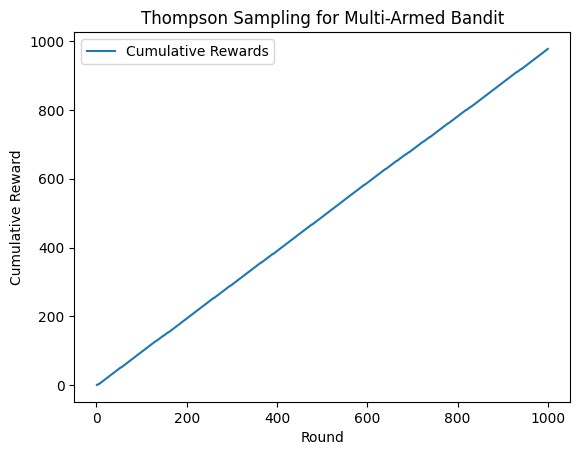

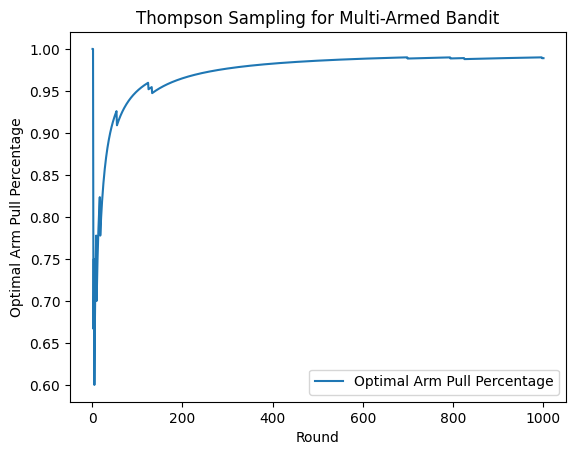

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
num_arms = 5

# True probability of success for each arm (unknown to the agent)
true_probabilities = np.random.uniform(0, 1, num_arms)

# Number of rounds/pulls
num_rounds = 1000

# Variables to keep track of each arm's successes and failures
successes = np.zeros(num_arms)
failures = np.zeros(num_arms)

# Variables to store cumulative rewards and optimal arm pulls
cumulative_rewards = np.zeros(num_rounds)
optimal_pulls = np.zeros(num_rounds)

# Thompson Sampling algorithm
for round in range(num_rounds):
    # Sample a probability of success for each arm from Beta distribution
    sampled_probabilities = np.random.beta(successes + 1, failures + 1)

    # Choose the arm with the highest sampled probability
    chosen_arm = np.argmax(sampled_probabilities)

    # Simulate pulling the chosen arm and observe the reward
    reward = np.random.binomial(1, true_probabilities[chosen_arm])

    # Update successes and failures for the chosen arm
    successes[chosen_arm] += reward
    failures[chosen_arm] += 1 - reward

    # Update cumulative rewards and optimal arm pulls
    cumulative_rewards[round] = cumulative_rewards[max(round - 1, 0)] + reward
    optimal_pulls[round] = (chosen_arm == np.argmax(true_probabilities))

# Plot cumulative rewards over time
plt.plot(np.arange(1, num_rounds + 1), cumulative_rewards, label='Cumulative Rewards')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Thompson Sampling for Multi-Armed Bandit')
plt.legend()
plt.show()

# Plot percentage of optimal arm pulls over time
optimal_pull_percentages = np.cumsum(optimal_pulls) / np.arange(1, num_rounds + 1)
plt.plot(np.arange(1, num_rounds + 1), optimal_pull_percentages, label='Optimal Arm Pull Percentage')
plt.xlabel('Round')
plt.ylabel('Optimal Arm Pull Percentage')
plt.title('Thompson Sampling for Multi-Armed Bandit')
plt.legend()
plt.show()